In [1]:
!pip install textract
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Replace 'your_folder_id' with the actual ID from the shareable link
folder_id = 'your_folder_id'

# Define the folder path
folder_path = '/content/drive/MyDrive/' + folder_id

# List the contents of the folder
file_list = os.listdir('/content/drive/MyDrive/Resumes')
print(file_list)

Mounted at /content/drive
['React resumes', 'Peoplesoft resumes', 'Internship resumes', 'Workday resumes', 'SQL Developer resumes', 'IMG', 'vector.pkl', 'Raw_Resume.csv', 'model_DT.pkl', 'Cleaned_Resumes.csv', 'skills.csv', 'app.py', 'Resume_Main.ipynb', 'IMG.png', 'folder_name']


In [4]:
os.listdir('/content/drive/MyDrive/Resumes')

['React resumes',
 'Peoplesoft resumes',
 'Internship resumes',
 'Workday resumes',
 'SQL Developer resumes',
 'IMG',
 'vector.pkl',
 'Raw_Resume.csv',
 'model_DT.pkl',
 'Cleaned_Resumes.csv',
 'skills.csv',
 'app.py',
 'Resume_Main.ipynb',
 'IMG.png',
 'folder_name']

1. Extract the text from dataset

In [5]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
6,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft


In [7]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes/React resumes'
for i in os.listdir(directory2):
    if i.endswith('.docx')or i.endswith('.pdf'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [8]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
1,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer
2,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer
5,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
6,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
7,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
9,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer


In [9]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes/SQL Developer resumes'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [10]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
2,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
3,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
4,BUDDHA VAMSI ...,SQL Developer
5,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
6,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
7,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
9,KAMBALLA PRADEEP ...,SQL Developer


In [11]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes/Workday resumes'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [12]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,G Himaja\n\n ...,Workday
1,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
2,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
3,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
4,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
5,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
6,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
7,Workday HCM Techno functional Consultant ...,Workday
8,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday


In [13]:
file_path5 = []
category5  = []
directory5 = '/content/drive/MyDrive/Resumes/Internship resumes'
for i in os.listdir(directory5):
    if i.endswith('.docx'):
        os.path.join(directory5, i)
        file_path5.append((textract.process(os.path.join(directory5, i))).decode('utf-8'))
        category5.append('Internship')

In [14]:
data5 = pd.DataFrame(data = file_path5 , columns = ['Raw_Details'])
data5['Category5'] = category5
data5

,Raw_Details,Category5
0,SUSOVAN BAG \n\nSeeking a challenging po...,Internship
1,Name: Ravali P \n\n\n\n ...,Internship


3. Create DataFrame

In [15]:
resume_data = data1.append([data2, data3, data4, data5], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category5
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,NaN
2,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,NaN
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,NaN
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74,Shireesh Balasani ...,NaN,NaN,NaN,Workday,NaN
75,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,NaN
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,NaN
77,SUSOVAN BAG \n\nSeeking a challenging po...,NaN,NaN,NaN,NaN,Internship


In [16]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    22 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
 5   Category5    2 non-null      object
dtypes: object(6)
memory usage: 3.8+ KB


3.1. Merge all unnecessary column into one column

In [17]:
resume_data['Category'] = category1 + category2 + category3 + category4 + category5
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category5,Category
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...,...
74,Shireesh Balasani ...,NaN,NaN,NaN,Workday,NaN,Workday
75,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,NaN,Workday
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,NaN,Workday
77,SUSOVAN BAG \n\nSeeking a challenging po...,NaN,NaN,NaN,NaN,Internship,Internship


In [18]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4','Category5'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

3.2. Final Dataset

In [19]:
resume_data.head(25)

,Category,Raw_Details
0,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
6,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
7,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."


In [20]:
resume_data["Raw_Details"][4]

'Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\nMaster of computer applications, Vinayaka Missions University, Chennai, Tamilnadu, India (3year program- 2010).\n\n\n\nRELEVANT EXPERIENCE\n\nSenior Consultant – Randstad, Hyderabad, Andhra Pradesh, India (June 2020 to till date)\n\n\n\nPr

3.3 Save new 'csv' File

In [21]:
resume_data.to_csv('Raw_Resume.csv', index=False)

4. Data Understanding

In [22]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
...,...,...
74,Workday,Shireesh Balasani ...
75,Workday,Workday Integration Consultant\n\n\n\nName ...
76,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
77,Internship,SUSOVAN BAG \n\nSeeking a challenging po...


In [23]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
56,Workday,G Himaja\n\n ...
57,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
58,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
59,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
60,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
61,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
62,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
63,Workday,Workday HCM Techno functional Consultant ...
64,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
65,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...


In [24]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

4.1. Number Of Words in each Resume

In [25]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,448
1,Classification: Internal\n\nClassification: In...,558
2,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433


4.2 Number of Characters

In [26]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,3714
1,Classification: Internal\n\nClassification: In...,4917
2,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669


4.3. Number of Stopwords

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,88
1,Classification: Internal\n\nClassification: In...,114
2,PeopleSoft Administration\n\n \n\nVivekanand S...,520
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84


4.4. Number of Numerics

In [28]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,13
1,Classification: Internal\n\nClassification: In...,7
2,PeopleSoft Administration\n\n \n\nVivekanand S...,17
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13


In [29]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
1,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
...,...,...,...,...,...,...
74,Workday,Shireesh Balasani ...,1945,11610,365,16
75,Workday,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3
76,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1035,6933,193,7
77,Internship,SUSOVAN BAG \n\nSeeking a challenging po...,533,1901,39,0


5. Text Preprocessing

5.1. Using Regular Expression

In [30]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [31]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

5.2 Clean text from Resumes

In [32]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
...,...,...,...
74,Workday,Shireesh Balasani ...,shireesh balasani hcm consultant profile summa...
75,Workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant name sri krishn...
76,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant professional ...
77,Internship,SUSOVAN BAG \n\nSeeking a challenging po...,susovan bag seeking challenging position field...


5.3 Save the clean data in new 'csv' file

In [33]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,hari narayana professional summary years exper...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,murali professional summary years experience p...
...,...,...
74,Workday,shireesh balasani hcm consultant profile summa...
75,Workday,workday integration consultant name sri krishn...
76,Workday,venkateswarlu workday consultant professional ...
77,Internship,susovan bag seeking challenging position field...


In [34]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [35]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,hari narayana professional summary years exper...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,murali professional summary years experience p...
...,...,...
74,Workday,shireesh balasani hcm consultant profile summa...
75,Workday,workday integration consultant name sri krishn...
76,Workday,venkateswarlu workday consultant professional ...
77,Internship,susovan bag seeking challenging position field...


In [36]:
resume_data.Resume_Details[5]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche

6. Name Entity Recognition(NER)

In [37]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('technical', 164), ('creating', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


7. Part of Specch Tagging

In [38]:
!python -m spacy download en_core_web_lg
import spacy
import spacy.displacy

nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [39]:
for token in doc_block[:30]:
    print(token,token.pos_)

  SPACE
people NOUN
code PROPN
component NOUN
interface NOUN
application NOUN
packages NOUN
peoplesoft VERB
hcm PROPN
oracle PROPN
windows PROPN
technical PROPN
associate PROPN
verizon PROPN
hyderabad PROPN
andhra PROPN
pradesh PROPN
india PROPN
dec PROPN
may AUX
project VERB
verizon PROPN
wireless PROPN
development PROPN
client PROPN
verizon PROPN
responsibilities NOUN
analyze VERB
requirement NOUN
documents NOUN


7.1. Filtering out the Nouns and Verbs from Text to Tokens

In [40]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['summary', 'years', 'experience', 'application', 'enhancement', 'implementation', 'data', 'conversion', 'support', 'upgrade', 'projects', 'people', 'tools', 'knowledge', 'applications', 'skill', 'people', 'tools', 'application', 'designer', 'application', 'engine', 'people', 'code', 'application', 'packages', 'application', 'applications', 'modules', 'procurement', 'billing', 'modules', 'recruiting', 'performance', 'management', 'interfaces', 'component', 'interface', 'file', 'layout', 'languages', 'database', 'operating', 'system', 'windows', 'unix', 'education', 'bachelor', 'working', 'people', 'consultant', 'consultant', 'project', 'enhancements', 'responsibilities', 'analyze', 'requirement', 'documents', 'understand', 'customer', 'business', 'requirement', 'provide', 'approach', 'assign', 'customize', 'system', 'applications', 'designed', 'objects', 'scratch', 'write', 'people', 'implement', 'business', 'logic', 'design', 'custom', 'application', 'engine', 'programs', 'process', '

7.2. Counting all the Nouns and Verbs present in the tokens of words

In [41]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,545
1,application,417
2,using,384
3,workday,353
4,reports,326
5,data,307
6,project,291
7,business,260
8,server,243
9,web,238


7.3 Visualiing the result of Top 20 Nouns and Verbs most frequently

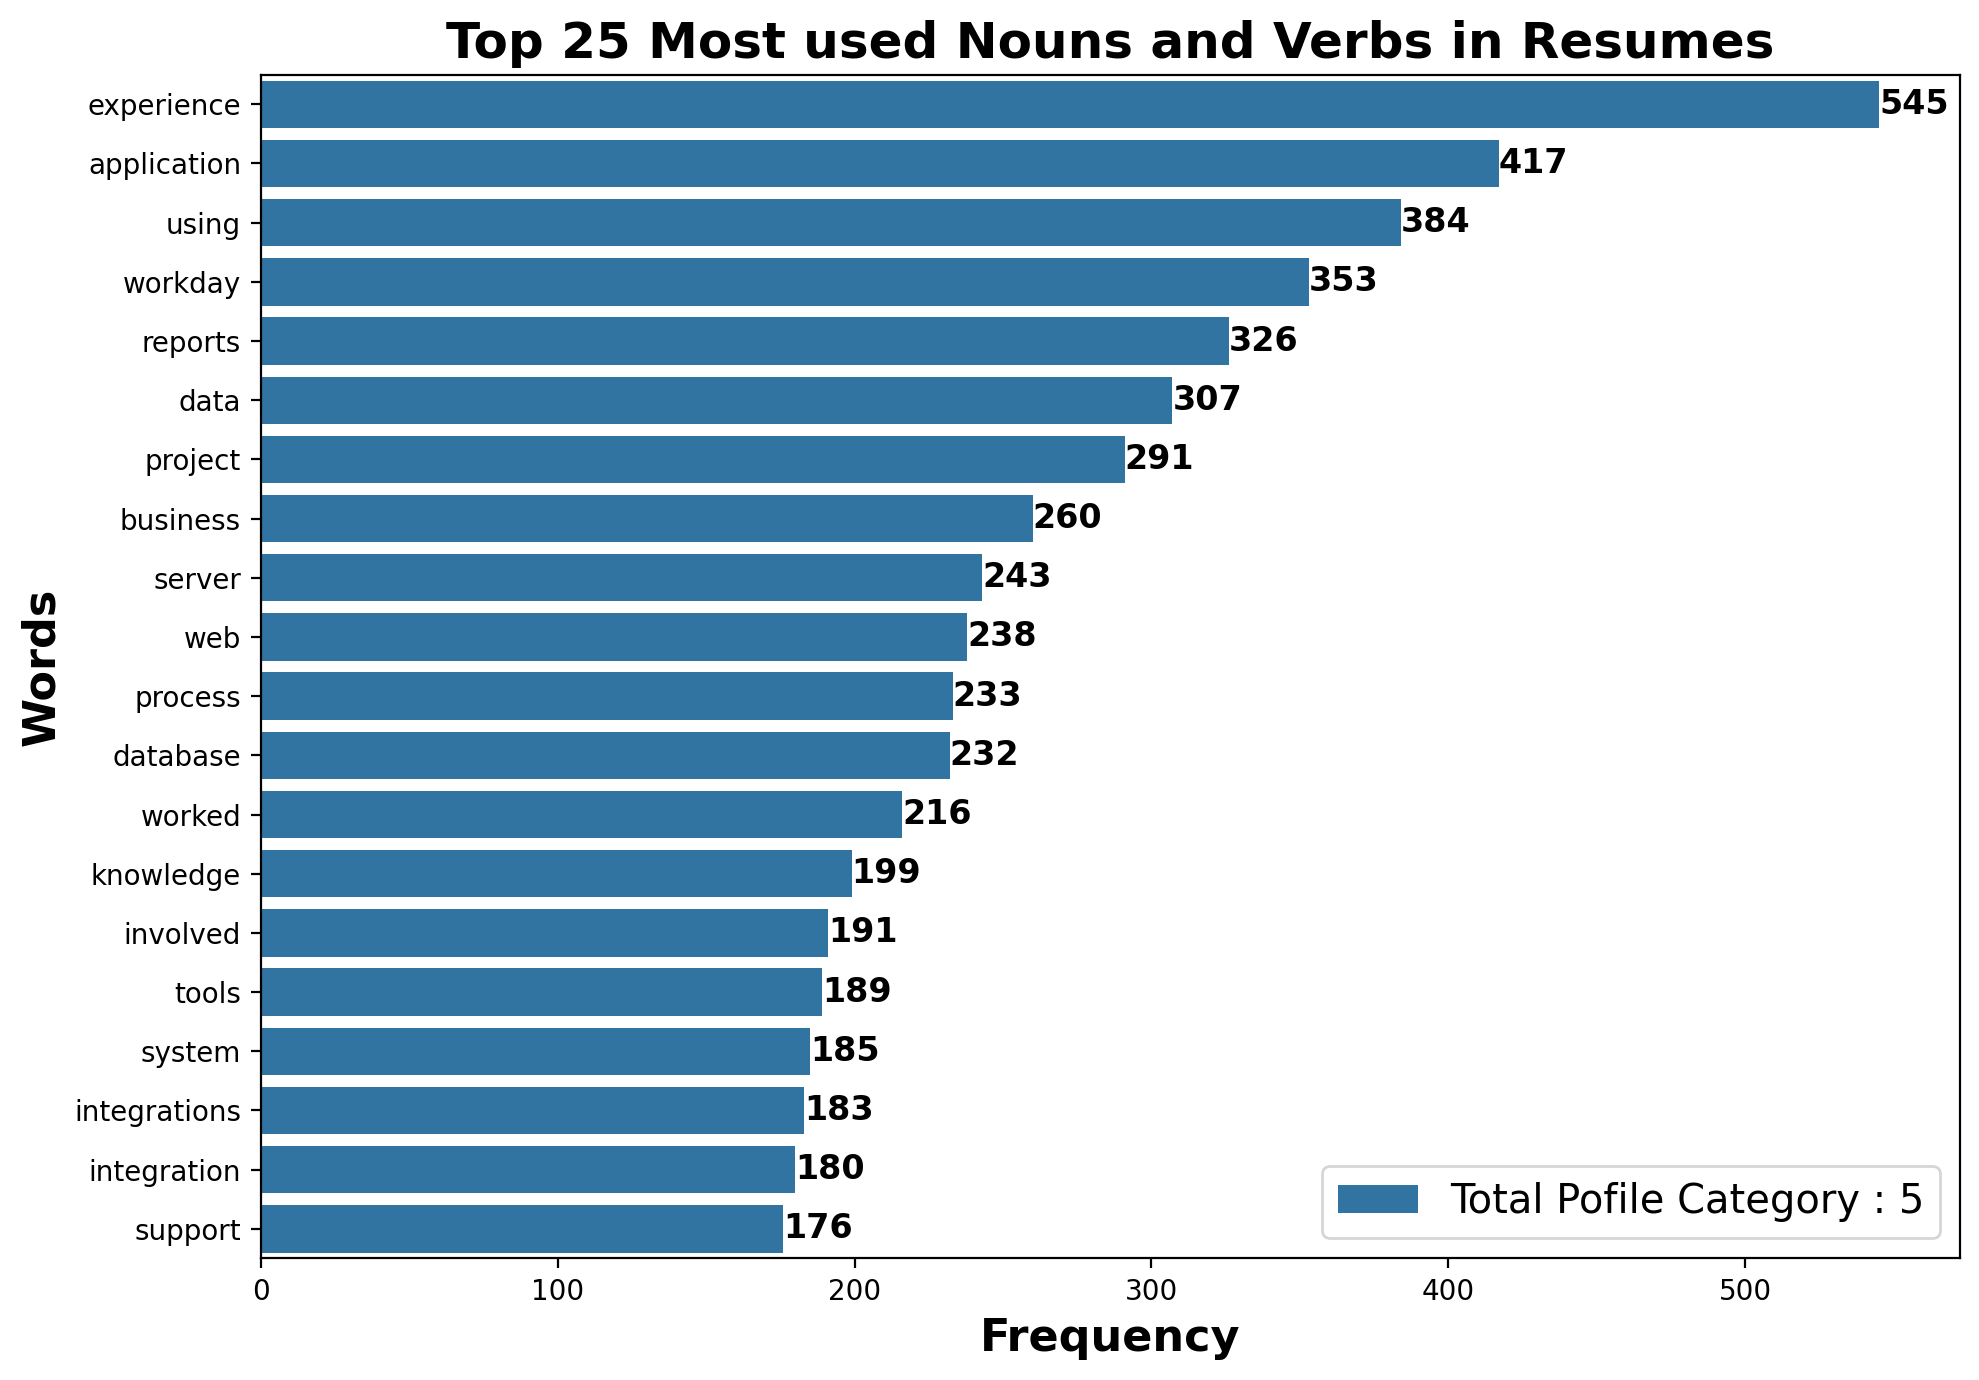

In [42]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/drive/MyDrive/Resumes/IMG', dpi = 500)

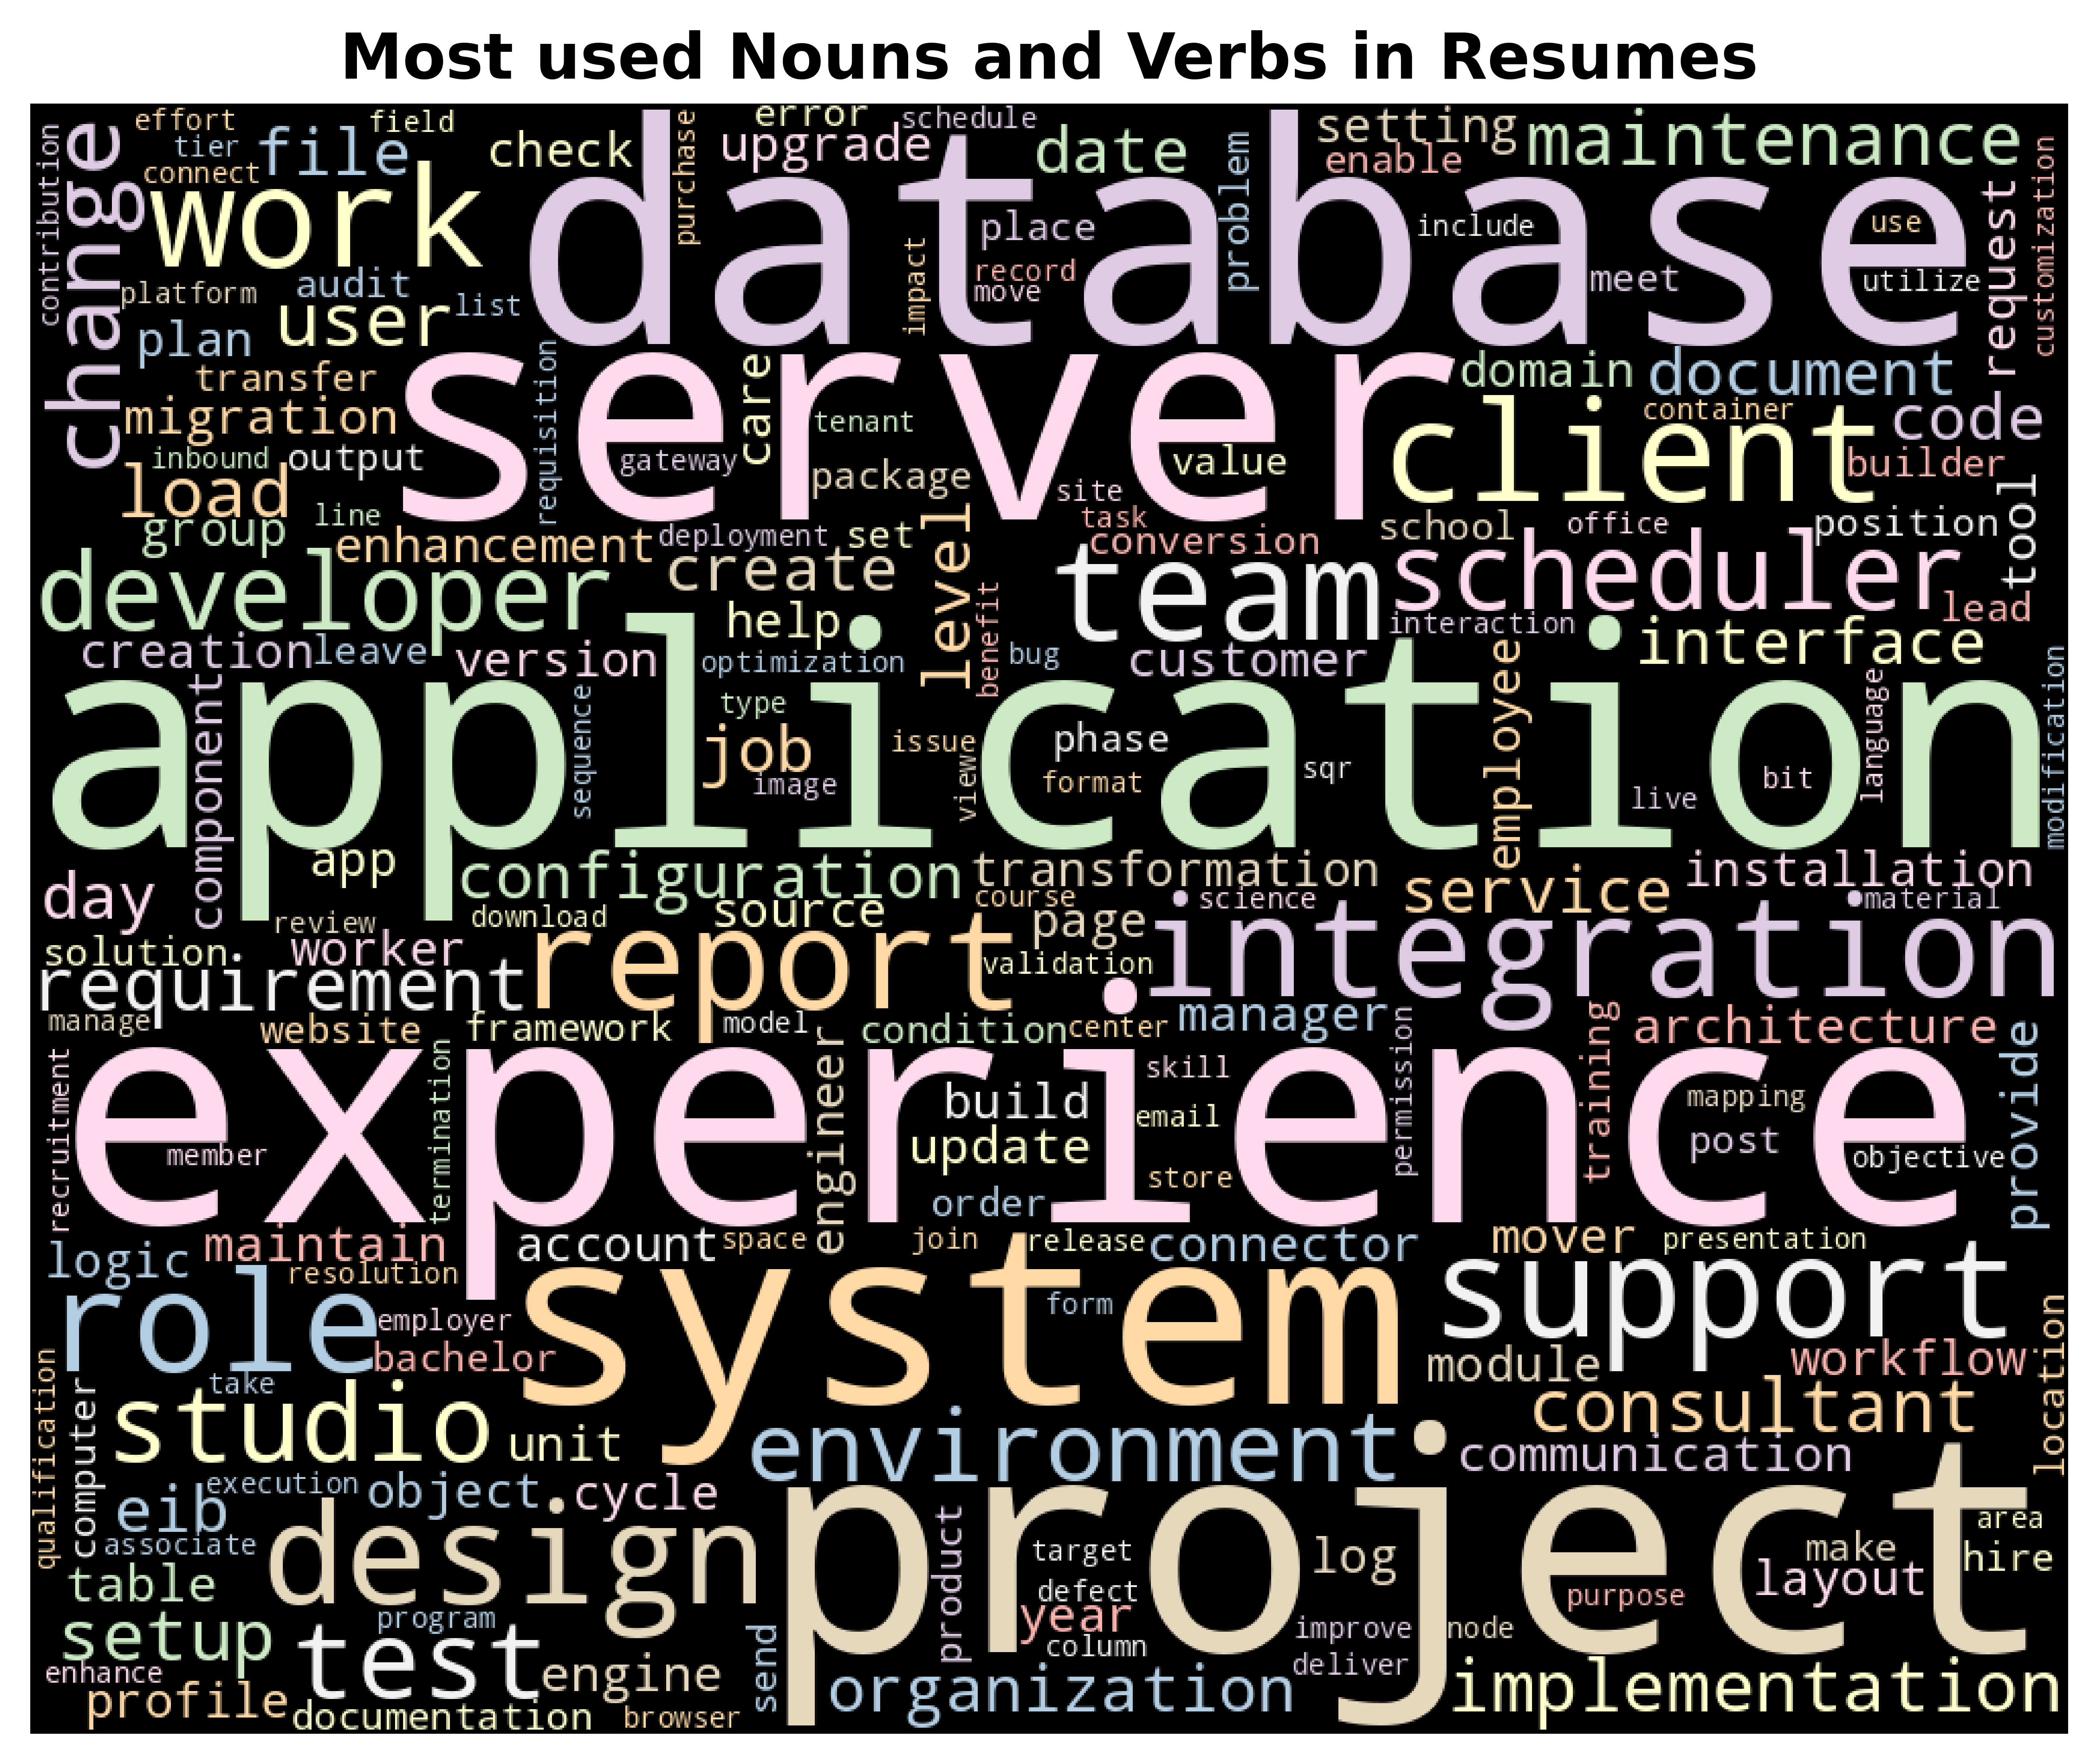

In [43]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('/content/drive/MyDrive/Resumes/IMG/Word_Clouds_Noun_Verb.png')
plt.show()

In [60]:
file_path   =  r'/content/drive/MyDrive/Resumes2/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [61]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [62]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [63]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

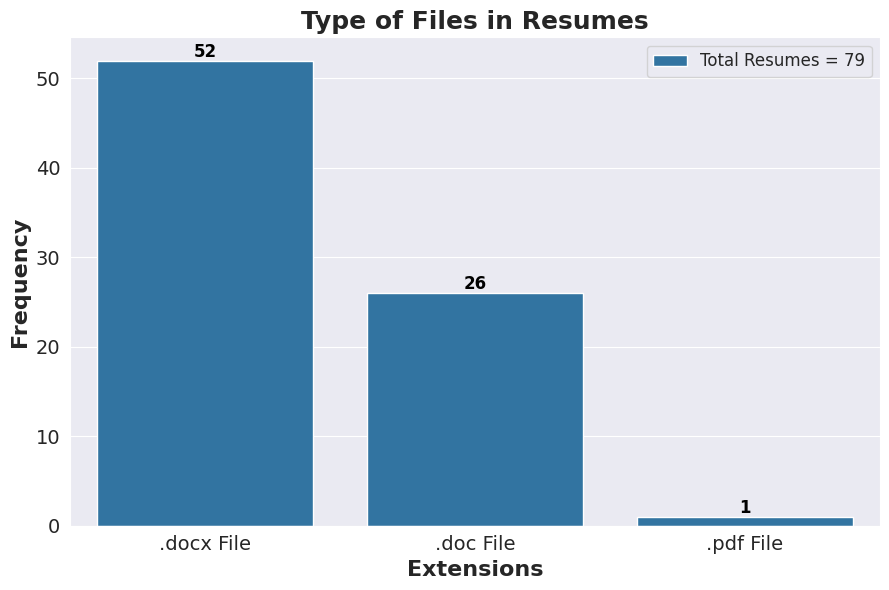

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data\File_Type_Bar', dpi = 500)

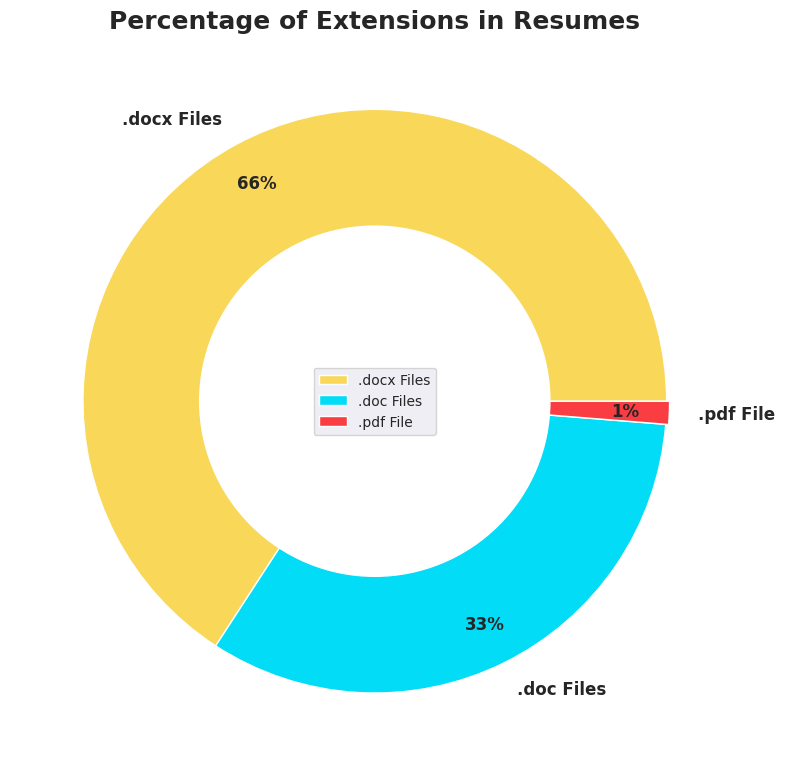

In [65]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data\Per_File_Pai', dpi = 500)

In [94]:
file_path = r'/content/drive/MyDrive/Resumes2/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [95]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,React resumes,React Developer_Deepakreddy.docx
1,React resumes,Reactjs Developer_Prabakaran_Musquare Technolo...
2,React resumes,React Dev_Krishna Kanth_Musquare Technologies....
3,React resumes,Reactjs Developer_M Lokesh.docx
4,React resumes,Reactjs Developer_Ranga Gaganam_Musquare Techn...
...,...,...
75,SQL Developer resumes,kamballapradeep.docx
76,SQL Developer resumes,Vinod B.docx
77,SQL Developer resumes,Nazeer Basha.docx
78,SQL Developer resumes,Priyanka L.docx


In [96]:
resume_data.Profile.value_counts().index

Index(['React resumes', 'Workday resumes', 'Peoplesoft resumes',
       'SQL Developer resumes', 'Internship resumes'],
      dtype='object')

In [97]:
resume_data.Profile.value_counts()

React resumes            23
Workday resumes          21
Peoplesoft resumes       20
SQL Developer resumes    14
Internship resumes        2
Name: Profile, dtype: int64

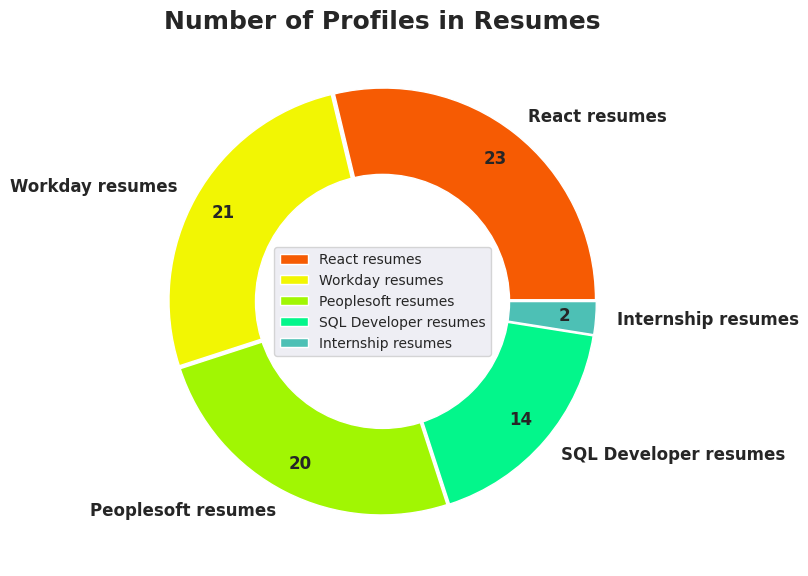

In [98]:
fig = plt.figure(figsize=(8, 8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
# Make sure explode has the same length as sizes
explode = (0.01,) * len(sizes)

plt.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
        pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data/No_Resume_Pai', dpi=500)


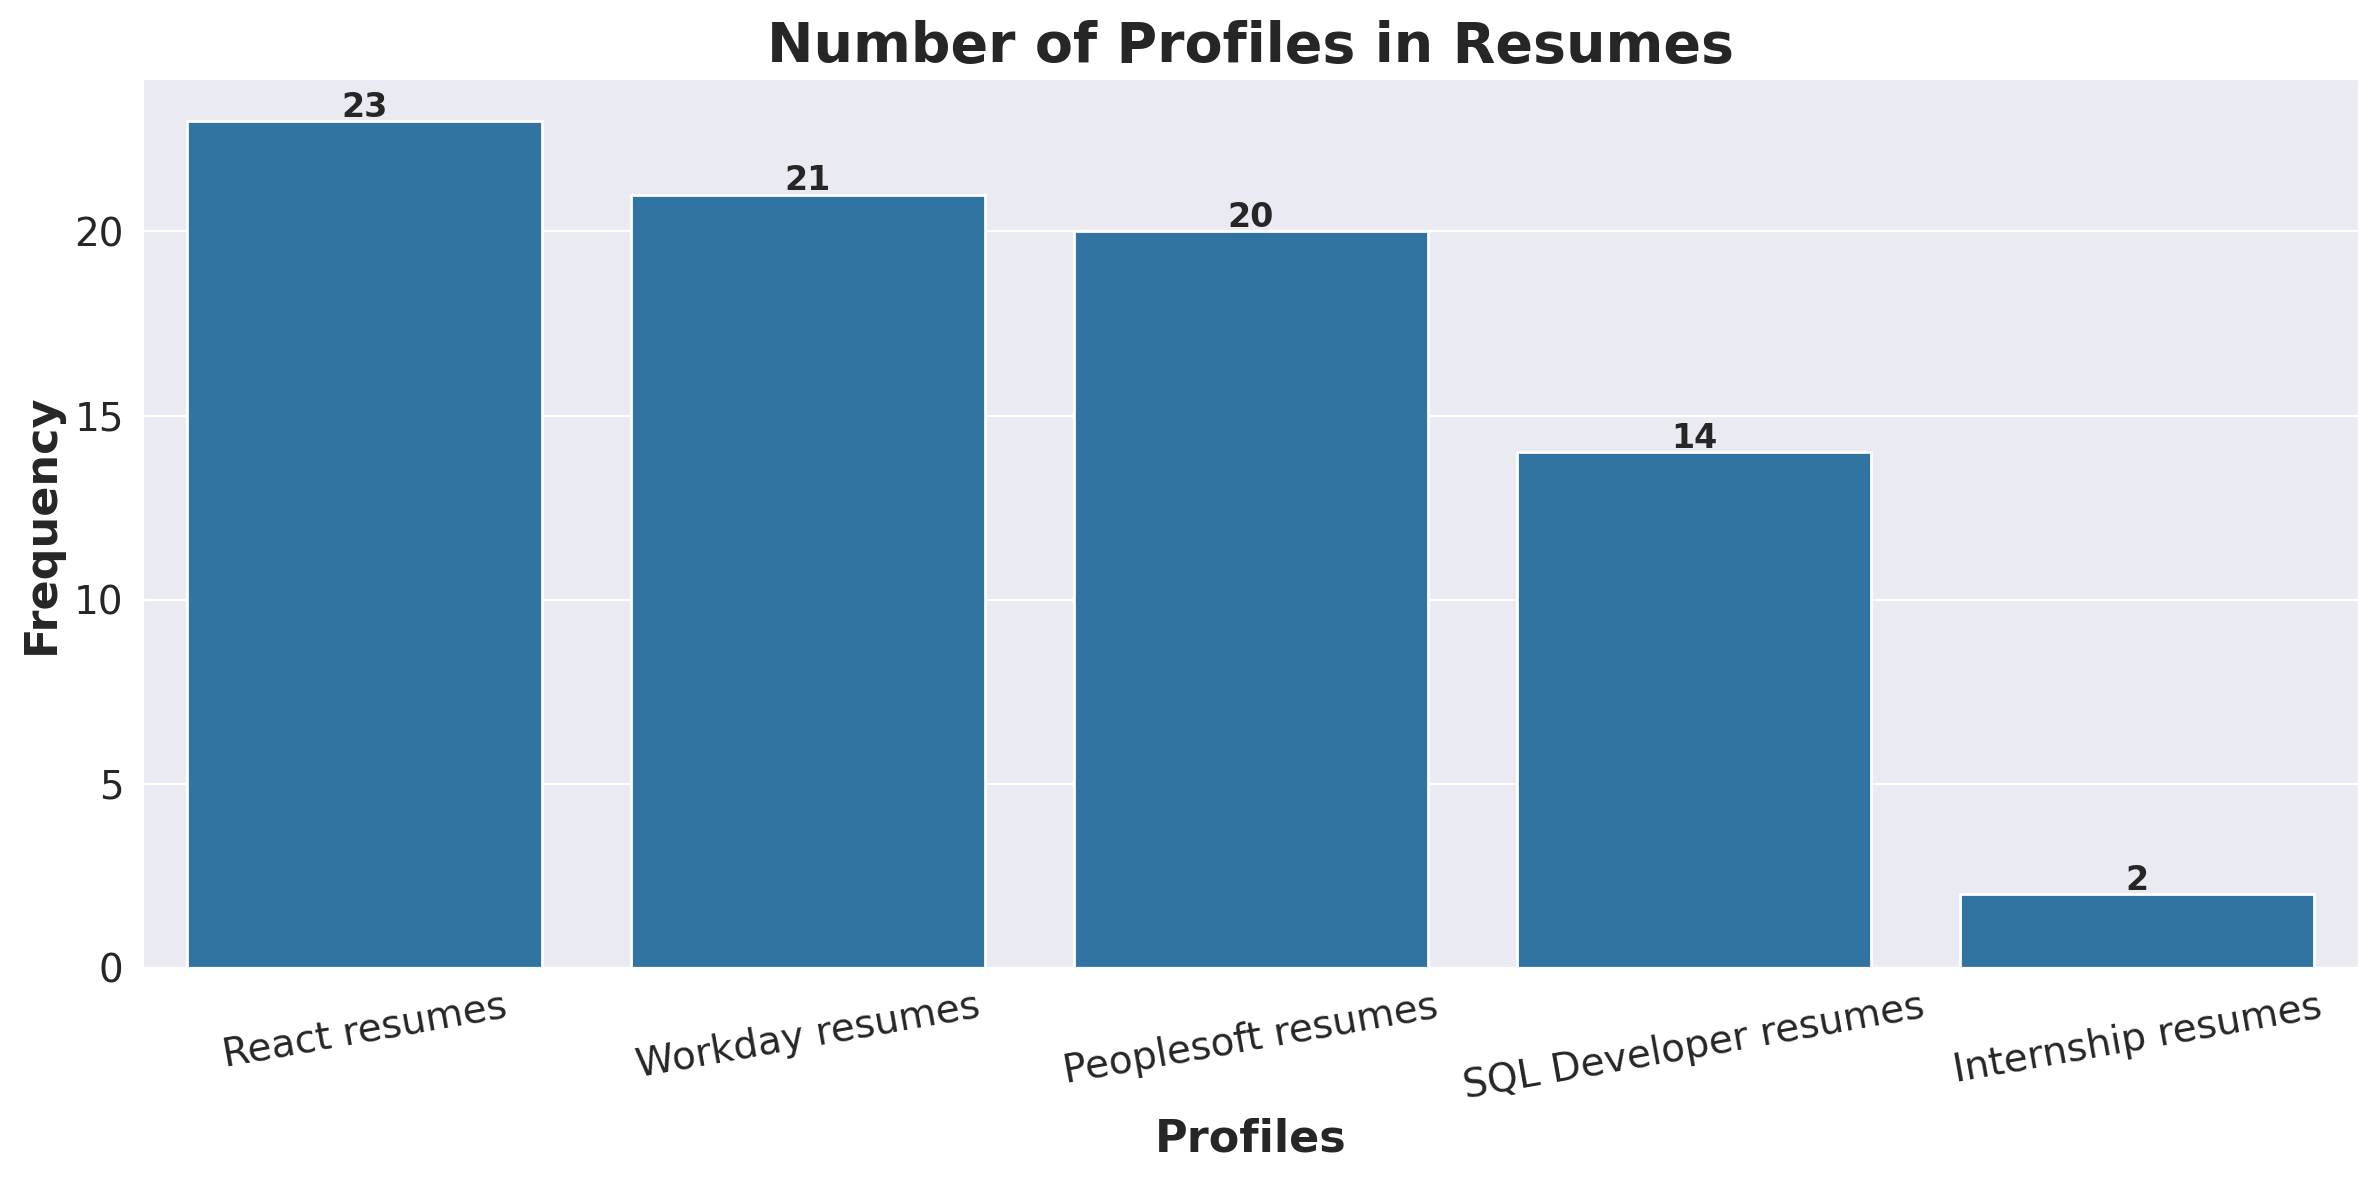

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported your data and have it stored in 'resume_data'

fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
profile_counts = resume_data['Profile'].value_counts()

ax = sns.barplot(x=profile_counts.index, y=profile_counts, ax=axe)
ax.set_xlabel('Profiles', size=16, fontweight='bold')
ax.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=10)
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points',
                 fontsize=12,
                 fontweight='bold')

plt.tight_layout()
plt.show()

# Optionally, save the figure
# fig.savefig('/content/sample_data/No_Resume_Bar.png', dpi=500)


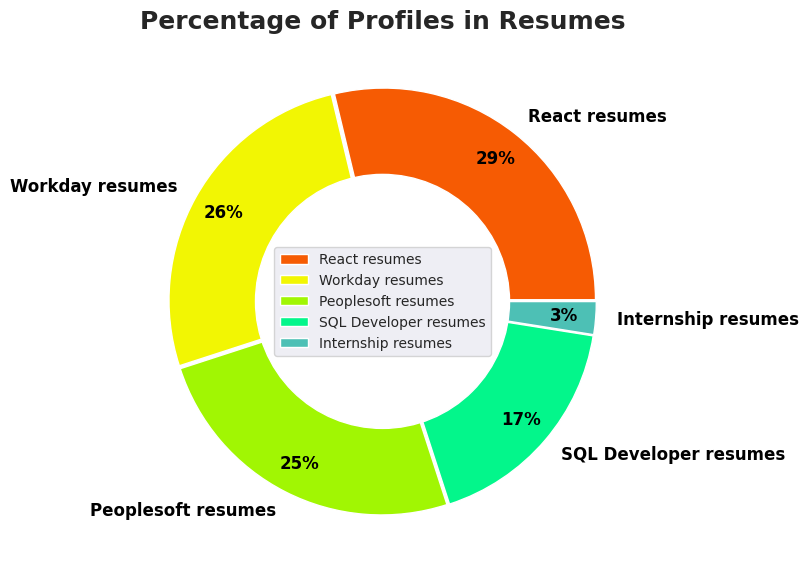

In [100]:
fig = plt.figure(figsize=(8, 8), dpi=100)

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01,) * len(sizes)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.85, explode=explode,
        startangle=0, textprops={'size': 'large', 'fontweight': 'bold', 'rotation': 0, 'color': 'black'})

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data/Per_Cat_Pai', dpi=500)


In [104]:
import docx2txt

def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/drive/MyDrive/Resumes2/React resumes/React Developer_Deepakreddy.docx'))


Kanumuru Deepak Reddy



 



CAREER OBJECTIVE:



To secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.



ACADEMIC QUALIFICATIONS:





Qualification

Institute

Board (or) University

Year of completion

Percentage/CGPA

B.Tech (E.C.E)

Audisankara College of Engineering & Technology,Gudur.

JNTU Anantapur.

2018

77.3

Intermediate

Narayana Junior college, Naidupet.

Board of

Intermediate, AP.

2014

89.5

SSC

Navodaya High School,Naidupet

Board of Secondary education, AP.

2012

6.7



PROJECT:



Title :Density based Traffic Control System USING ARDUINO.



Duration:4 months.



Description: Traffic congestion is a severe problem in most of the cities across the world and it has become a nightmare for the citizens. It is caused by delay in signal, inappropriate timing of traffic signalling etc. The delay of traffic light is hard coded and it does not depend 

In [105]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,hari narayana professional summary years exper...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,murali professional summary years experience p...
...,...,...
74,Workday,shireesh balasani hcm consultant profile summa...
75,Workday,workday integration consultant name sri krishn...
76,Workday,venkateswarlu workday consultant professional ...
77,Internship,susovan bag seeking challenging position field...


In [106]:
!pip install textblob
from textblob import TextBlob
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['classification']),
 WordList(['internal']),
 WordList(['classification']),
 WordList(['internal']),
 WordList(['murali']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['working']),
 WordList(['peoplesoft']),
 WordList(['administration']),
 WordList(['performing']),
 WordList(['various']),
 WordList(['infrastructure']),
 WordList(['related']),
 WordList(['activities']),
 WordList(['peoplesoft']),
 WordList(['environments']),
 WordList(['installed'])]

In [107]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['classification', 'internal']),
 WordList(['internal', 'classification']),
 WordList(['classification', 'internal']),
 WordList(['internal', 'murali']),
 WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured'])]

In [108]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:30]

[WordList(['classification', 'internal', 'classification']),
 WordList(['internal', 'classification', 'internal']),
 WordList(['classification', 'internal', 'murali']),
 WordList(['internal', 'murali', 'experience']),
 WordList(['murali', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'working']),
 WordList(['experience', 'working', 'peoplesoft']),
 WordList(['working', 'peoplesoft', 'administration']),
 WordList(['peoplesoft', 'administration', 'performing']),
 WordList(['administration', 'performing', 'various']),
 WordList(['performing', 'various', 'infrastructure']),
 WordList(['various', 'infrastructure', 'related']),
 WordList(['infrastructure', 'related', 'activities']),
 WordList(['related', 'activities', 'peoplesoft']),
 WordList(['activities', 'peoplesoft', 'environments']),
 WordList(['peoplesoft', 'environments', 'installed']),
 WordList(['environments', 'installed', 

In [109]:
resume_data['Resume_Details']

0     hari narayana professional summary years exper...
1     classification internal classification interna...
2     peoplesoft administration vivekanand sayana ca...
3     tanna sujatha objective seeking challenging ro...
4     murali professional summary years experience p...
                            ...                        
74    shireesh balasani hcm consultant profile summa...
75    workday integration consultant name sri krishn...
76    venkateswarlu workday consultant professional ...
77    susovan bag seeking challenging position field...
78    name ravali curriculum vitae specialization co...
Name: Resume_Details, Length: 79, dtype: object

In [110]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [111]:
df_ngram

,Frequency,Unigram_Bigram
0,600,experience
1,453,peoplesoft
2,432,workday
3,418,application
4,395,using
...,...,...
25661,1,abilities telugu
25662,1,abilities skills
25663,1,abilities problem
25664,1,abilities good


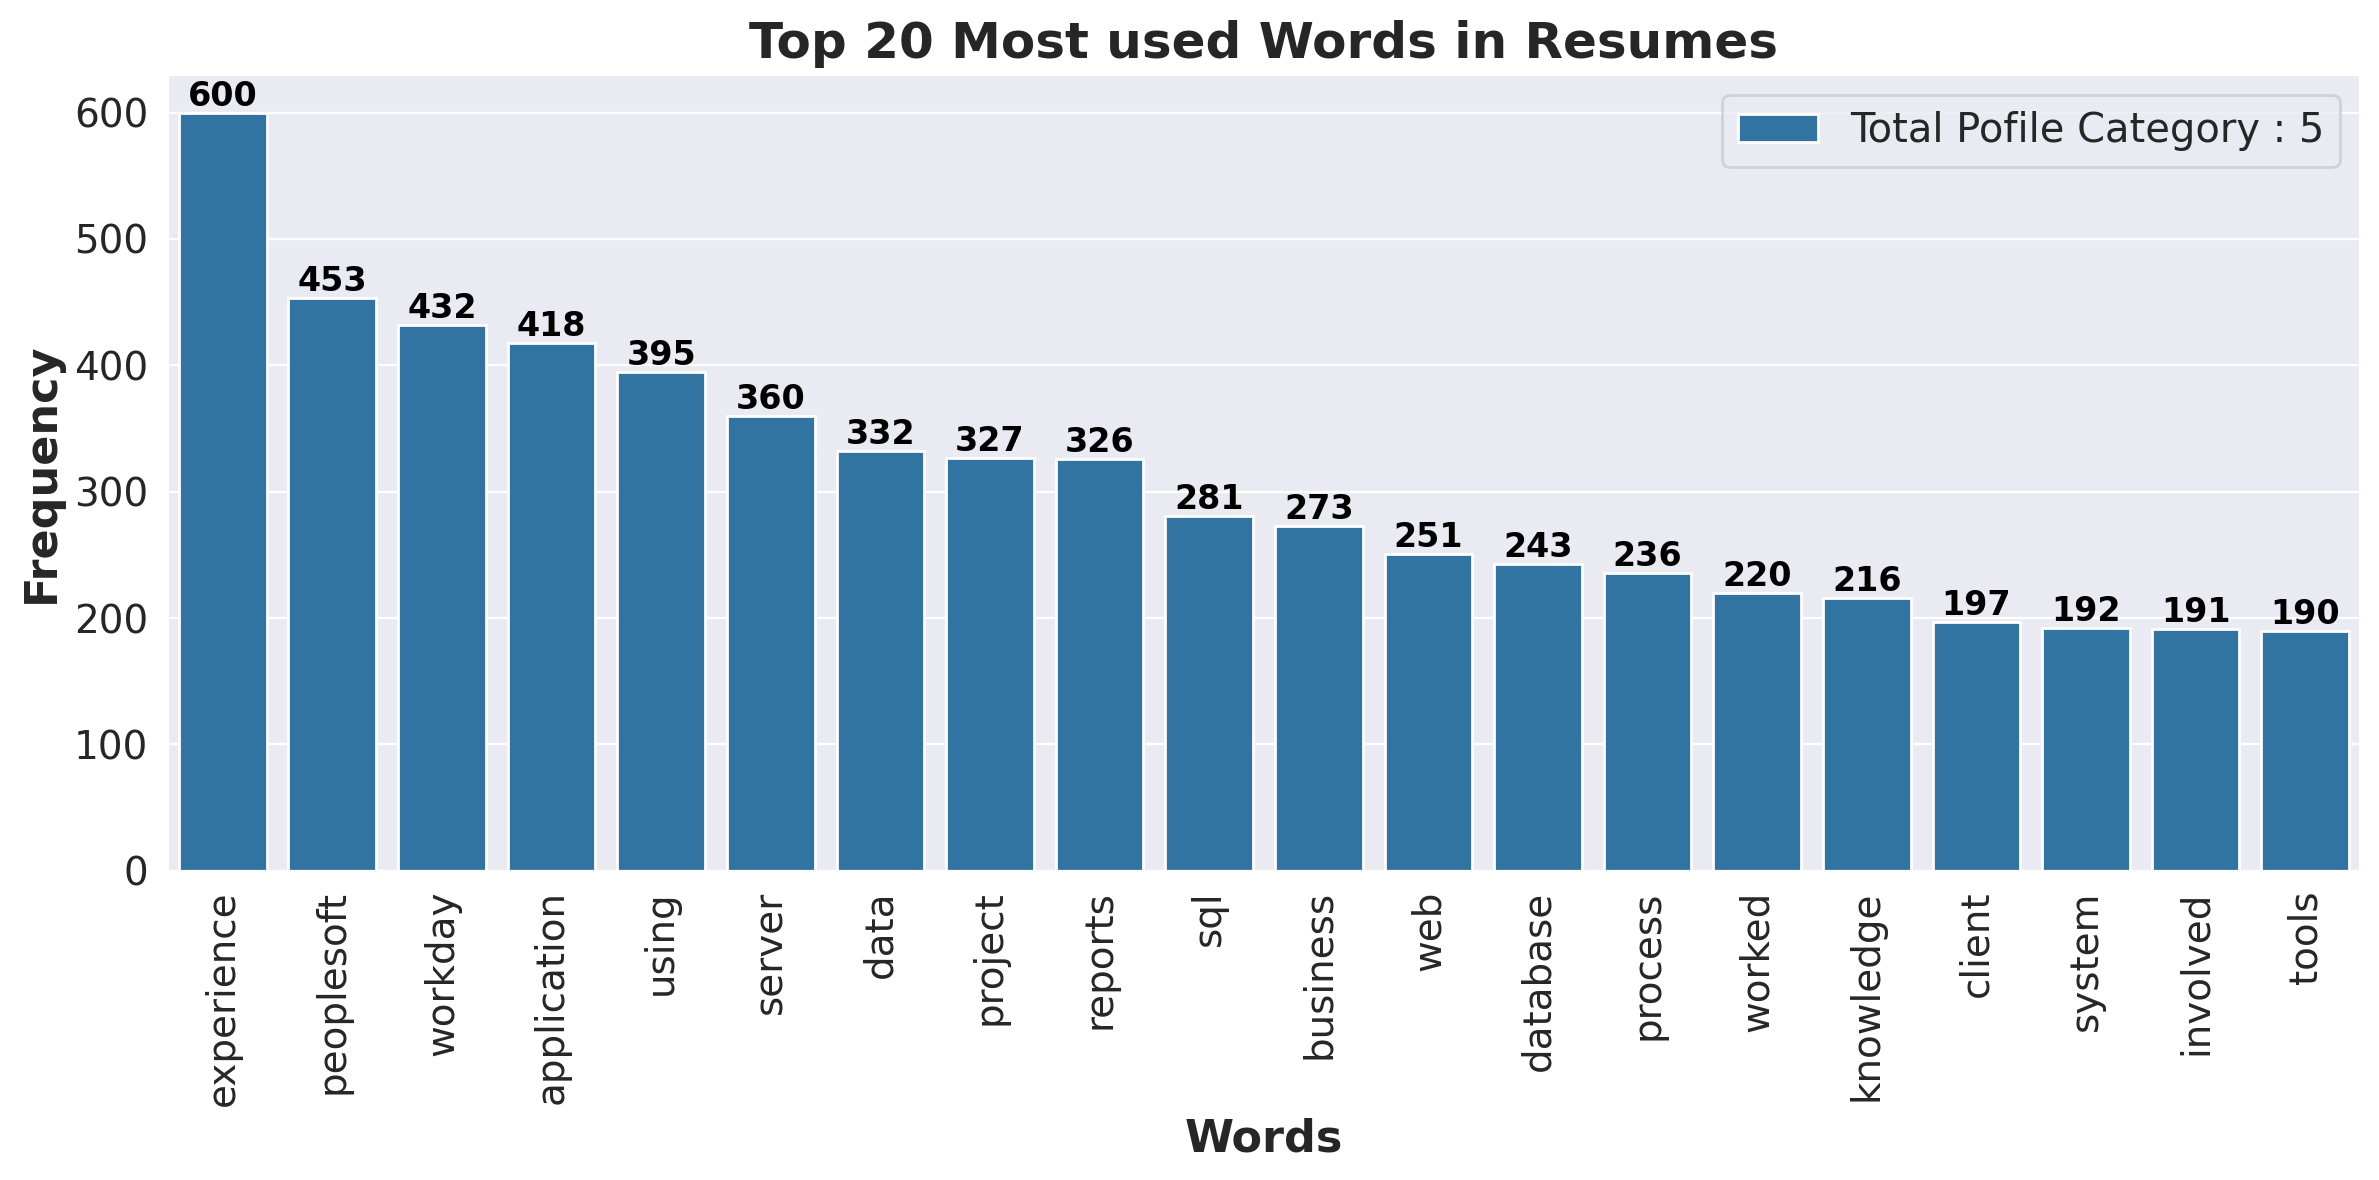

In [112]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data/Top_Words_Bar', dpi = 500)

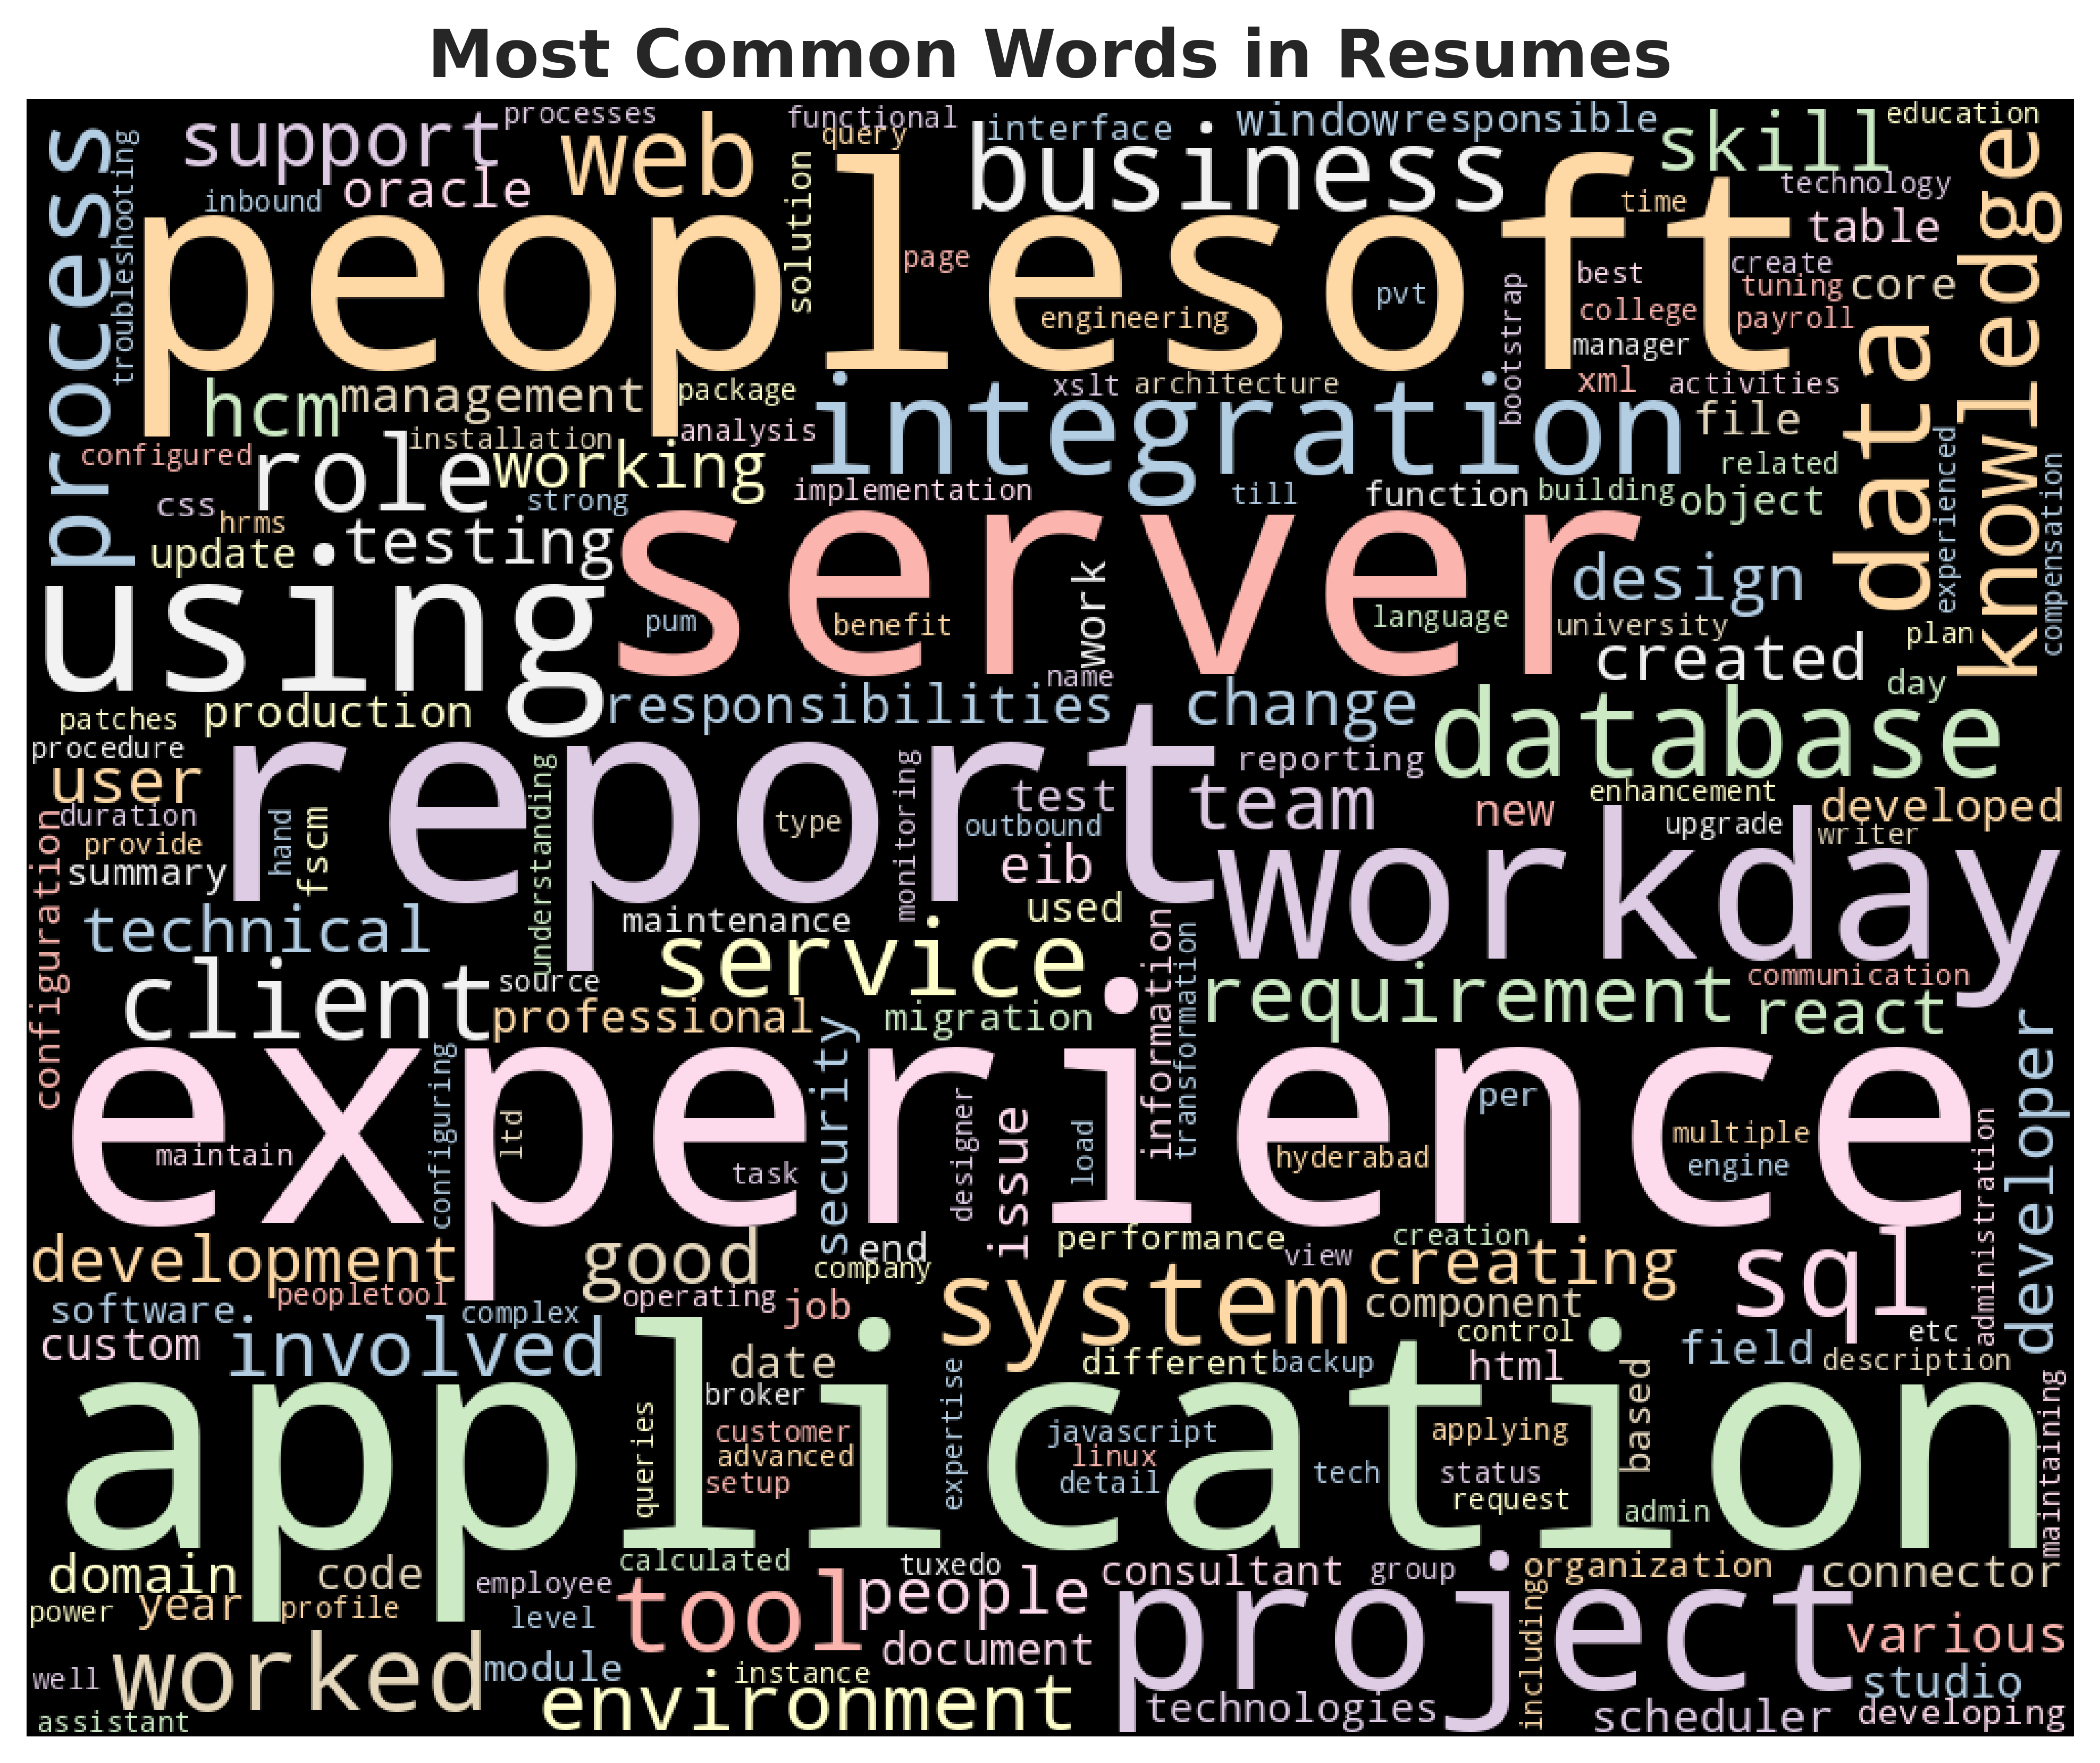

In [113]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('/content/sample_data/Word_Clowds.png')
plt.show()

In [114]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,hari narayana professional summary years exper...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,murali professional summary years experience p...


In [115]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,hari narayana professional summary years exper...,1
1,PeopleSoft,classification internal classification interna...,1
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...,1
3,PeopleSoft,tanna sujatha objective seeking challenging ro...,1
4,PeopleSoft,murali professional summary years experience p...,1
...,...,...,...
74,Workday,shireesh balasani hcm consultant profile summa...,4
75,Workday,workday integration consultant name sri krishn...,4
76,Workday,venkateswarlu workday consultant professional ...,4
77,Internship,susovan bag seeking challenging position field...,0


In [116]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,2.405063
std,1.203829
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4.000000


In [117]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [118]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [119]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [121]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [122]:
x_train.shape, x_test.shape

((59, 3848), (20, 3848))

In [123]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'Internship' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'PeopleSoft' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'Internship' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'React JS Developer'
 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer' 'PeopleSoft'
 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday' 'Workday'
 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']
['PeopleSoft' 'PeopleSoft' 'React JS Developer' 'Workday' 'Workday'
 'React JS Developer' 'React JS Develope

(None, None)

In [124]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [125]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.66
Accuracy of  test set    : 0.60
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       0.50      0.20      0.29         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.42      1.00      0.59         5

          accuracy                           0.60        20
         macro avg       0.48      0.55      0.47        20
      weighted avg       0.53      0.60      0.52        20




In [126]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        Internship       0.00      0.00      0.00         0
        PeopleSoft       0.75      0.60      0.67         5
React JS Developer       1.00      0.83      0.91         6
     SQL Developer       0.60      0.75      0.67         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.80        20
         macro avg       0.67      0.64      0.65        20
      weighted avg       0.86      0.80      0.82        20




In [127]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [128]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 0.90
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.90        20
         macro avg       0.94      0.89      0.90        20
      weighted avg       0.93      0.90      0.90        20




In [129]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [130]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.85
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.40      0.57         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       0.62      1.00      0.77         5

          accuracy                           0.85        20
         macro avg       0.91      0.85      0.84        20
      weighted avg       0.91      0.85      0.84        20




In [131]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.95
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       0.83      1.00      0.91         5
React JS Developer       1.00      0.83      0.91         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.96      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [132]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      0.83      0.91         6
     SQL Developer       0.80      1.00      0.89         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.95      0.96      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [133]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.20      0.33         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       0.56      1.00      0.71         5

          accuracy                           0.80        20
         macro avg       0.89      0.80      0.76        20
      weighted avg       0.89      0.80      0.76        20




In [134]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.661017,0.60,0.48,0.55,0.47
1,DecisionTree Classifier,1.000000,0.80,0.67,0.64,0.65
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,0.983051,0.90,0.94,0.89,0.90
4,Logistic Regression,0.966102,0.95,0.96,0.94,0.95
5,Bagging Classifier,0.966102,0.85,0.91,0.85,0.84
6,AdaBoost Classifier,0.966102,0.95,0.96,0.96,0.95
7,Gradient Boosting Classifier,1.000000,0.95,0.95,0.96,0.95
8,Naive Bayes Classifier,1.000000,0.80,0.89,0.80,0.76


In [135]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

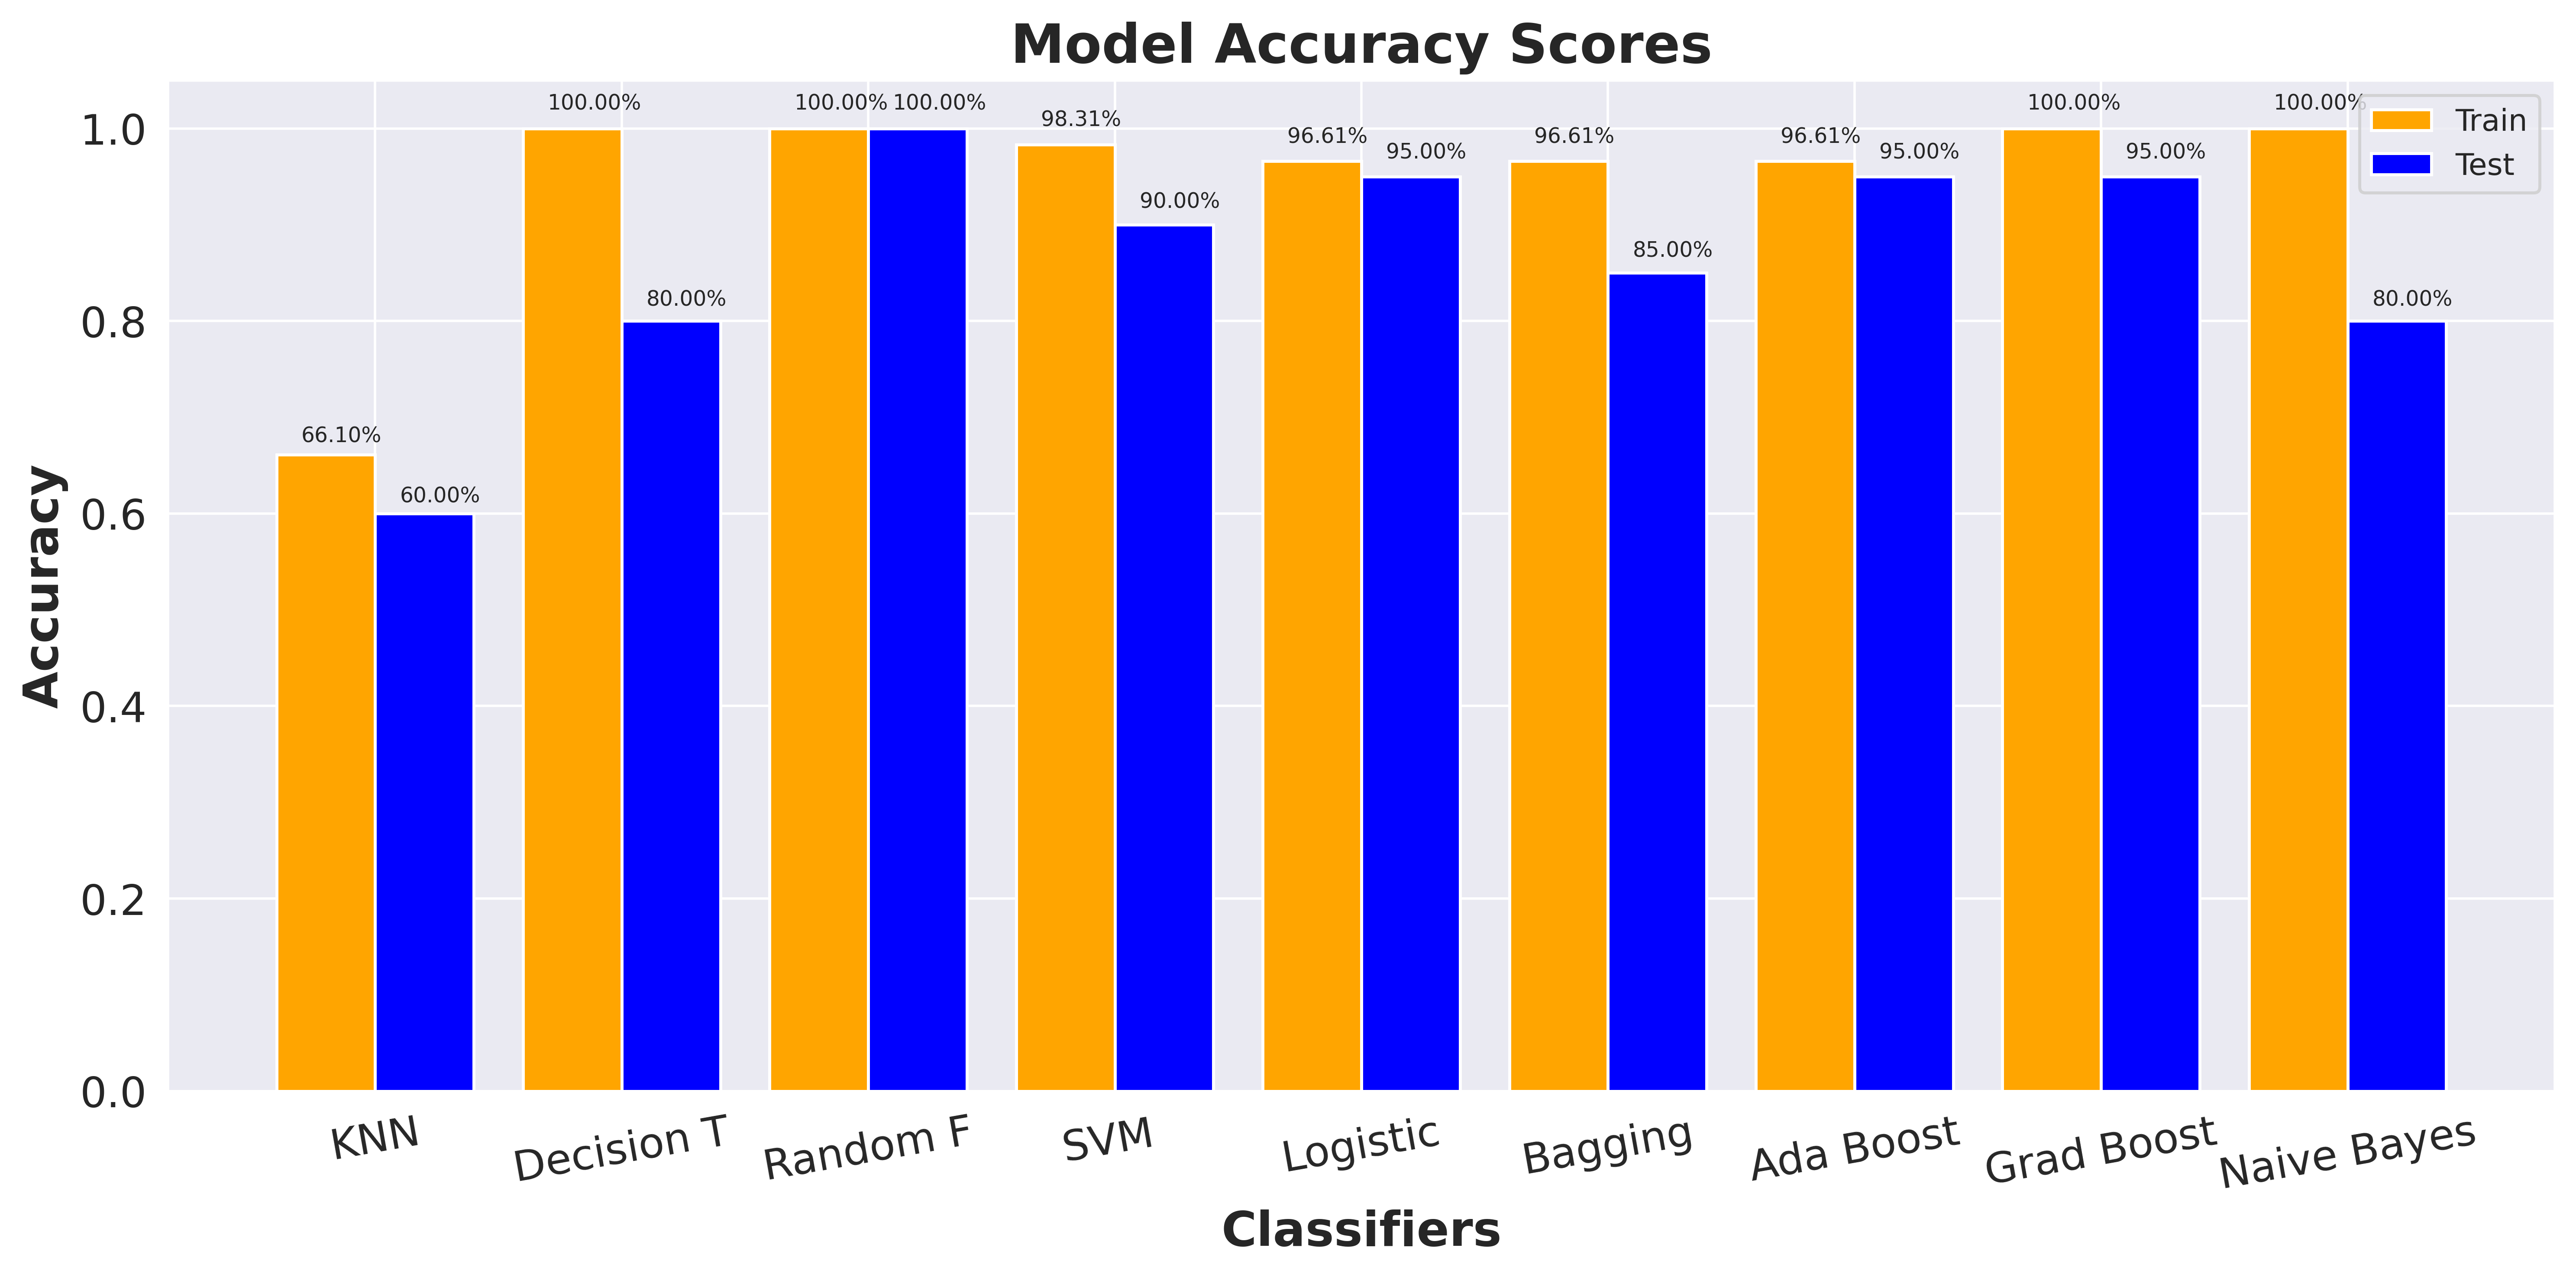

In [136]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

In [137]:
import pickle
filename = 'model_DT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [138]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))